In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import warnings
from sklearn.metrics import mean_squared_error
from time import time
warnings.filterwarnings('ignore')
cmap = "YlGnBu"

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

## Предобработка

In [289]:
df = pd.read_csv("kc_house_data.csv")

In [10]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

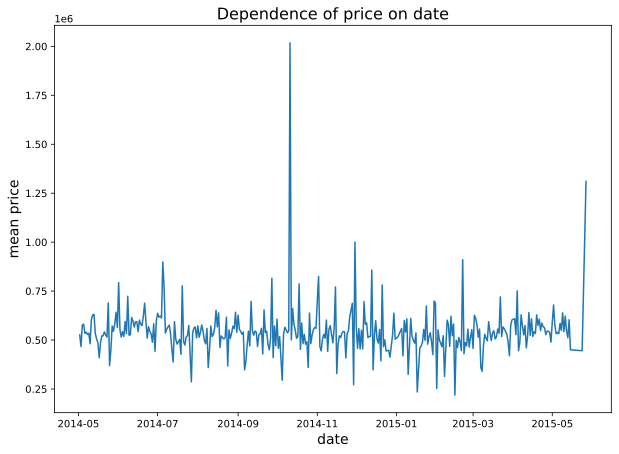

In [28]:
df["date"] = df["date"].apply(pd.to_datetime)

mean_prices = []
for date in np.unique(df["date"]):
    mean_prices.append(np.mean(df["price"][df["date"] == date]))

plt.figure(figsize=(10,7))
plt.title("Dependence of price on date", fontsize=16)
plt.plot(np.unique(df["date"]), mean_prices)
plt.ylabel("mean price", fontsize=14)
plt.xlabel("date", fontsize=14)
plt.show()

Есть сильный скачок в 14-м году в один из дней. Однако преобладающих по ценам промежутков не наблюдается, поэтому попробуем обучать модель без колонки "date"

In [47]:
target = df["price"].to_numpy()
df.drop(["id", "date", "price"], axis=1, inplace=True)
data = df.to_numpy()
print(data.shape)
print(target.shape)

(21613, 18)
(21613,)


In [48]:
from sklearn.model_selection import train_test_split
seed = 42

X_train, X_holdout, y_train, y_holdout = train_test_split(data, target, test_size=0.2, random_state=seed)

## RandomForest

In [49]:
import ensembles as ens

model = ens.RandomForestMSE(5, max_depth=6)

In [75]:
import importlib

importlib.reload(ens)

<module 'ensembles' from '/home/riot/Programming/practicum/task7/ensembles.py'>

In [50]:
model.fit(X_train, y_train)

In [51]:
y_pred = model.predict(X_holdout)

RMSE для случайного леса:

In [52]:
np.sqrt(mean_squared_error(y_holdout, y_pred))

190833.49482814406

Сравним с обычным решающим деревом:

In [53]:
from sklearn.tree import DecisionTreeRegressor

test_model = DecisionTreeRegressor(max_depth=6, max_features=X_train.shape[1]//3)

In [54]:
test_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features=6)

In [55]:
np.sqrt(mean_squared_error(y_holdout, test_model.predict(X_holdout)))

218554.55887089067

Получили ошибку меньше чем у обычного дерева, значит всё ок

### Количество деревьев

In [82]:
import ensembles as ens

n_trees = 30
model1 = ens.RandomForestMSE(n_trees, max_depth=1)
model2 = ens.RandomForestMSE(n_trees, max_depth=3)
model3 = ens.RandomForestMSE(n_trees, max_depth=6)
model4 = ens.RandomForestMSE(n_trees, max_depth=12)
model5 = ens.RandomForestMSE(n_trees, max_depth=None)
model1.fit(X_train, y_train, X_holdout, y_holdout)
model2.fit(X_train, y_train, X_holdout, y_holdout)
model3.fit(X_train, y_train, X_holdout, y_holdout)
model4.fit(X_train, y_train, X_holdout, y_holdout)
model5.fit(X_train, y_train, X_holdout, y_holdout)

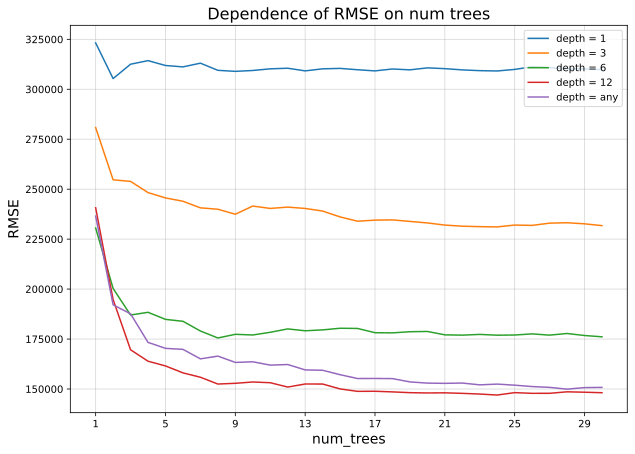

In [83]:
plt.figure(figsize=(10,7))
plt.title("Dependence of RMSE on num trees", fontsize=16)
plt.plot(np.arange(1, n_trees + 1), np.sqrt(model1.scores_), label="depth = 1")
plt.plot(np.arange(1, n_trees + 1), np.sqrt(model2.scores_), label="depth = 3")
plt.plot(np.arange(1, n_trees + 1), np.sqrt(model3.scores_), label="depth = 6")
plt.plot(np.arange(1, n_trees + 1), np.sqrt(model4.scores_), label="depth = 12")
plt.plot(np.arange(1, n_trees + 1), np.sqrt(model5.scores_), label="depth = any")
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("num_trees", fontsize=14)
plt.xticks(np.arange(1, n_trees + 1, 4))
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()

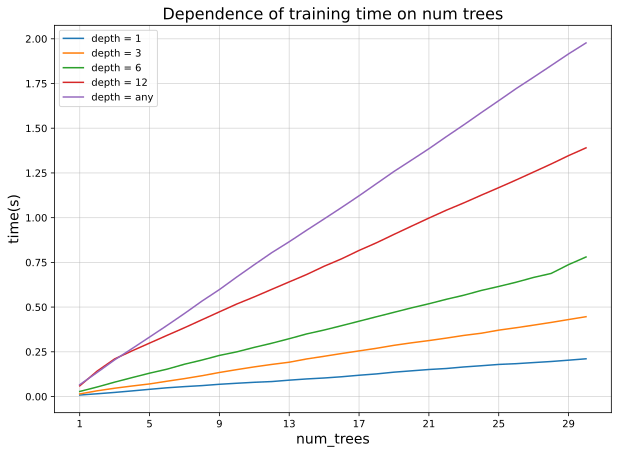

In [86]:
plt.figure(figsize=(10,7))
plt.title("Dependence of training time on num trees", fontsize=16)
plt.plot(np.arange(1, n_trees + 1), model1.time_, label="depth = 1")
plt.plot(np.arange(1, n_trees + 1), model2.time_, label="depth = 3")
plt.plot(np.arange(1, n_trees + 1), model3.time_, label="depth = 6")
plt.plot(np.arange(1, n_trees + 1), model4.time_, label="depth = 12")
plt.plot(np.arange(1, n_trees + 1), model5.time_, label="depth = any")
plt.ylabel("time(s)", fontsize=14)
plt.xlabel("num_trees", fontsize=14)
plt.xticks(np.arange(1, n_trees + 1, 4))
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()

Далее будем брать 20 деревьев в ансамбле, так если брать больше, то качество особо не меняется, а время занимает

### Размерность признакового пространства

In [107]:
feature_size = np.array([1, 4, 6, 9, 12, 18]) # 4 ~= log(18) ~= sqrt(18)
depth = [1, 3, 6, 12, None]
n_trees = 20
scores = [[] for i in range(5)]
training_time = [[] for i in range(5)]

for s in feature_size:
    for i, d in enumerate(depth):
        tmp = ens.RandomForestMSE(n_trees, max_depth=d, feature_subsample_size=s)
        now_time = time()
        tmp.fit(X_train, y_train)
        training_time[i].append(time() - now_time)
        scores[i].append(np.sqrt(mean_squared_error(y_holdout, tmp.predict(X_holdout))))

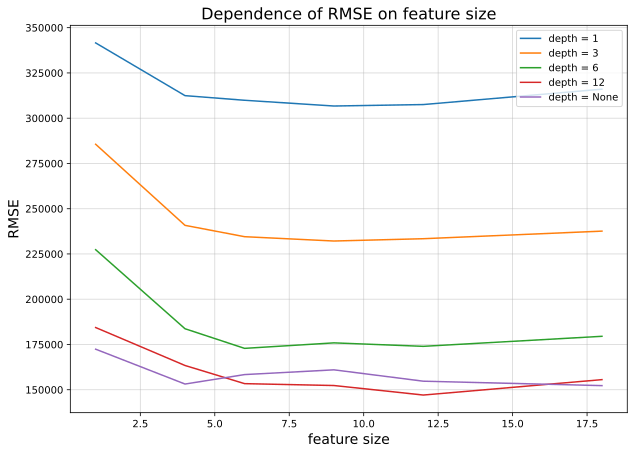

In [108]:
plt.figure(figsize=(10,7))
plt.title("Dependence of RMSE on feature size", fontsize=16)
for i,d in enumerate(depth):
    plt.plot(feature_size, scores[i], label=f"depth = {d}")
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("feature size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()

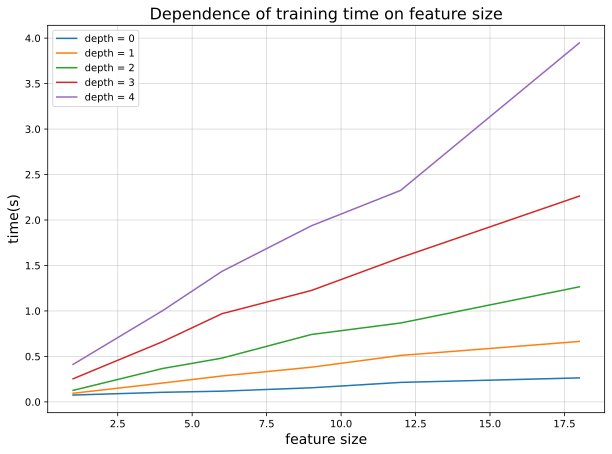

In [109]:
plt.figure(figsize=(10,7))
plt.title("Dependence of training time on feature size", fontsize=16)
for i,d in enumerate(depth):
    plt.plot(feature_size, training_time[i], label=f"depth = {i}")
plt.ylabel("time(s)", fontsize=14)
plt.xlabel("feature size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()

Достаточно брать `feature size = 6` == $\lfloor \frac{n}{3}\rfloor$ 

### Глубина

In [110]:
depth = [1, 2, 3, 5, 6, 8, 9, 12, None]
n_trees = 20
feature_size = 6
scores = [[] for i in range(5)]
training_time = [[] for i in range(5)]

for d in depth:
    tmp = ens.RandomForestMSE(n_trees, max_depth=d, feature_subsample_size=feature_size)
    now_time = time()
    tmp.fit(X_train, y_train)
    training_time.append(time() - now_time)
    scores.append(np.sqrt(mean_squared_error(y_holdout, tmp.predict(X_holdout))))

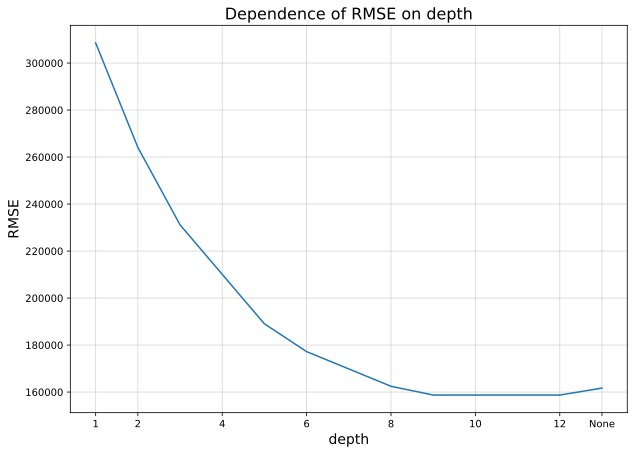

In [125]:
plt.figure(figsize=(10,7))
plt.title("Dependence of RMSE on depth", fontsize=16)
plt.plot([1, 2, 3, 5, 6, 8, 9, 12, 13], scores)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("depth", fontsize=14)
ticks = [1] + list(range(2,13, 2)) + [13]
plt.xticks(ticks)
ticks[-1] = "None"
plt.gca().set_xticklabels(ticks)
plt.grid(True, alpha=0.5)
plt.show()

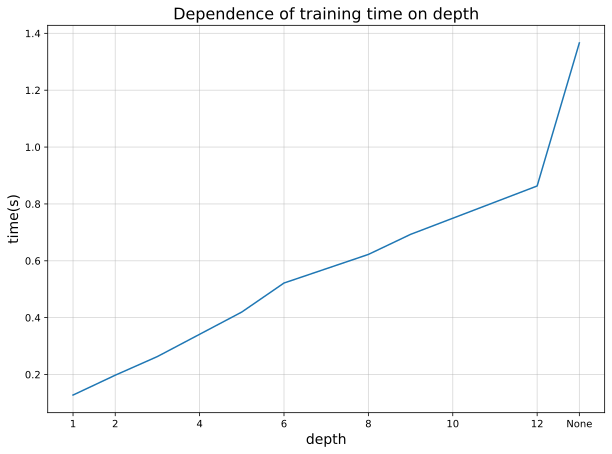

In [127]:
plt.figure(figsize=(10,7))
plt.title("Dependence of training time on depth", fontsize=16)
plt.plot([1, 2, 3, 5, 6, 8, 9, 12, 13], training_time[i])
plt.ylabel("time(s)", fontsize=14)
plt.xlabel("depth", fontsize=14)
ticks = [1] + list(range(2,13, 2)) + [13]
plt.xticks(ticks)
ticks[-1] = "None"
plt.gca().set_xticklabels(ticks)
plt.grid(True, alpha=0.5)
plt.show()

## Gradient Boosting

In [165]:
import ensembles as ens

model = ens.GradientBoostingMSE(100)

In [208]:
import importlib

importlib.reload(ens)

<module 'ensembles' from '/home/riot/Programming/practicum/task7/ensembles.py'>

In [166]:
model.fit(X_train, y_train)

In [158]:
y_pred = model.predict(X_holdout)

In [159]:
np.sqrt(mean_squared_error(y_holdout, y_pred))

152995.00303464558

In [197]:
import ensembles as ens

model = ens.GradientBoostingMSE(10, max_depth=6)

In [ ]:
model.fit(X_train, y_train, X_holdout, y_holdout)

In [199]:
np.sqrt(model.scores_)

array([15212228.84565295,   228332.68103288,   224745.82959611,
         223071.64582878,   220634.78806226,   219590.18630888,
         218442.79192493,   216974.96731003,   214674.82187219,
         214030.72405168])

Получили качество гораздо лучше решающего дерева (у решающего дерева 218554.56), значит алгоритм рабочий

### Количество деревьев

In [209]:
import ensembles as ens

n_trees = 1000
model = ens.GradientBoostingMSE(n_trees)
model.fit(X_train, y_train, X_holdout, y_holdout)

In [213]:
np.sqrt(model.scores_[:5])

array([15847468.36227757,   237326.25925181,   233887.70485795,
         231551.27826913,   229114.15738892])

Первая ошибка самая большая, поэтому будем выводить без неё (мешает графику)

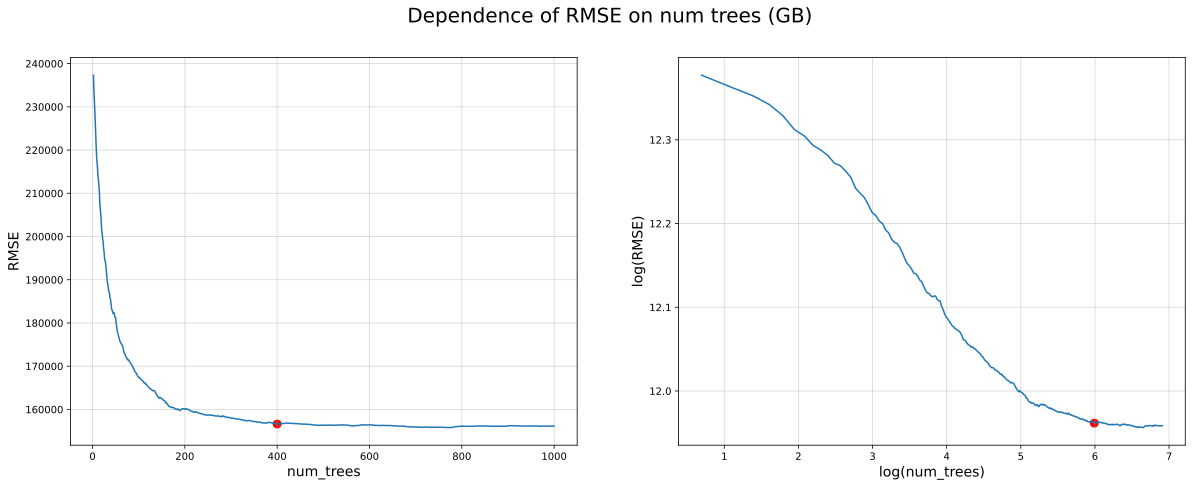

In [238]:
plt.figure(figsize=(20,7))
plt.suptitle("Dependence of RMSE on num trees (GB)", fontsize=20)

plt.subplot(121)
plt.plot(np.arange(2, n_trees + 1), np.sqrt(model.scores_[1:]))
plt.scatter([400], np.sqrt(model.scores_[399]), linewidths=3, c="r")
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("num_trees", fontsize=14)
plt.grid(True, alpha=0.5)

plt.subplot(122)
plt.plot(np.log(np.arange(2, n_trees + 1)), np.log(np.sqrt(model.scores_[1:])))
plt.scatter([np.log(400)], np.log(np.sqrt(model.scores_[399])), linewidths=3, c="r")
plt.ylabel("log(RMSE)", fontsize=14)
plt.xlabel("log(num_trees)", fontsize=14)
plt.grid(True, alpha=0.5)

plt.show()

Оптимально брать num_trees = 400

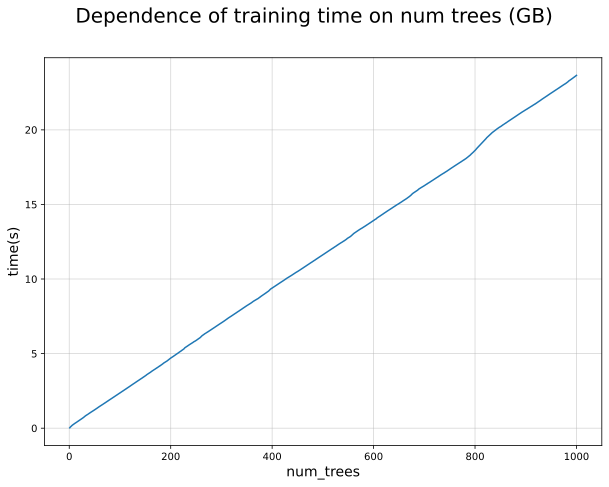

In [239]:
plt.figure(figsize=(10,7))
plt.suptitle("Dependence of training time on num trees (GB)", fontsize=20)

plt.plot(np.arange(1, n_trees + 1), model.time_)
plt.ylabel("time(s)", fontsize=14)
plt.xlabel("num_trees", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

Тут всё довольно линейно

### Размерность признакового пространства

In [264]:
feature_size = np.array([1, 4, 6, 7, 8, 9, 12, 18]) # 4 ~= log(18) ~= sqrt(18)
n_trees = 400
scores = []
training_time = []

for s in feature_size:
    tmp = ens.GradientBoostingMSE(n_trees, feature_subsample_size=s)
    now_time = time()
    tmp.fit(X_train, y_train)
    training_time.append(time() - now_time)
    scores.append(np.sqrt(mean_squared_error(y_holdout, tmp.predict(X_holdout))))

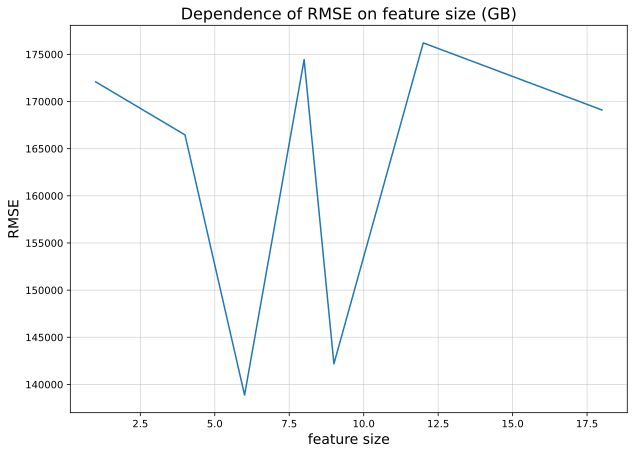

In [265]:
plt.figure(figsize=(10,7))
plt.title("Dependence of RMSE on feature size (GB)", fontsize=16)
plt.plot(feature_size, scores)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("feature size", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

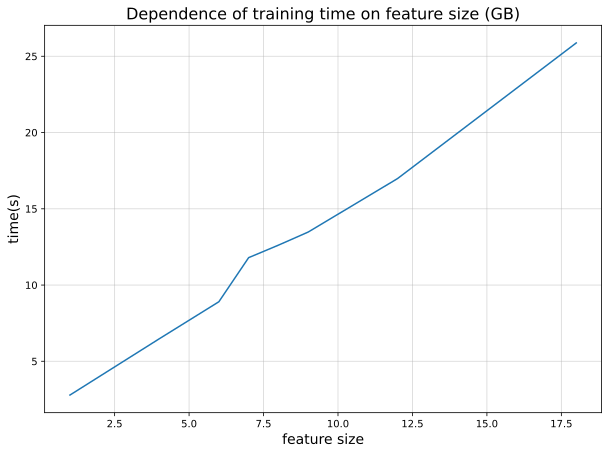

In [266]:
plt.figure(figsize=(10,7))
plt.title("Dependence of training time on feature size (GB)", fontsize=16)
plt.plot(feature_size, training_time)
plt.ylabel("time(s)", fontsize=14)
plt.xlabel("feature size", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

Качество сильно скачет в зависимости от `feature_size`. Однако в точке $\lfloor \frac{n}{3}\rfloor$ == 6, качество наилучшее. Скачет из-за неоднородности признаков

### Глубина

In [269]:
depth = [1, 2, 3, 5, 6, 8, 9, 12, None]
n_trees = 400
feature_size = 6
scores = []
training_time = []

for d in depth:
    tmp = ens.GradientBoostingMSE(n_trees, max_depth=d, feature_subsample_size=feature_size)
    now_time = time()
    tmp.fit(X_train, y_train)
    training_time.append(time() - now_time)
    scores.append(np.sqrt(mean_squared_error(y_holdout, tmp.predict(X_holdout))))

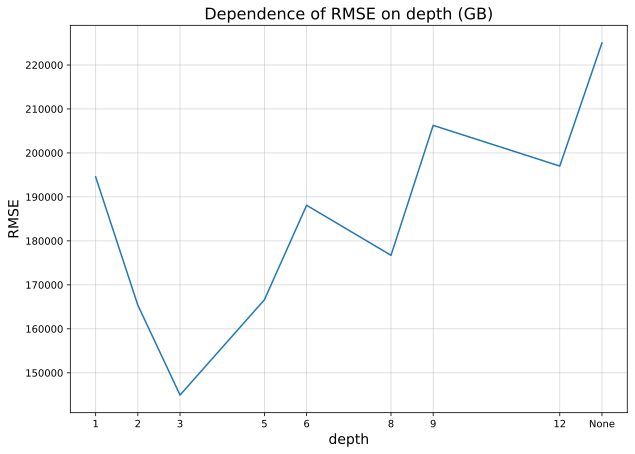

In [272]:
plt.figure(figsize=(10,7))
plt.title("Dependence of RMSE on depth (GB)", fontsize=16)
plt.plot([1, 2, 3, 5, 6, 8, 9, 12, 13], scores)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("depth", fontsize=14)
ticks = [1, 2, 3, 5, 6, 8, 9, 12, 13]
plt.xticks(ticks)
ticks[-1] = "None"
plt.gca().set_xticklabels(ticks)
plt.grid(True, alpha=0.5)
plt.show()

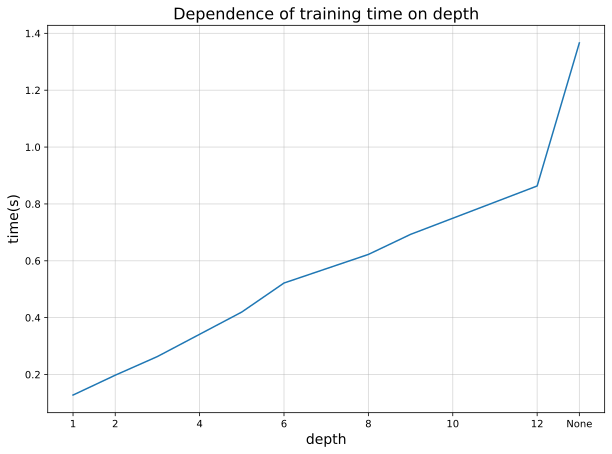

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Dependence of training time on depth (GB)", fontsize=16)
plt.plot([1, 2, 3, 5, 6, 8, 9, 12, 13], training_time[i])
plt.ylabel("time(s)", fontsize=14)
plt.xlabel("depth", fontsize=14)
ticks = [1] + list(range(2,13, 2)) + [13]
plt.xticks(ticks)
ticks[-1] = "None"
plt.gca().set_xticklabels(ticks)
plt.grid(True, alpha=0.5)
plt.show()

Лучший depth оказался равным 3-м. Чтобы строить более качественную модель, нужны более простые модели, потому что так мы снижаем корреляцию между этими моделями, а значит мы уменьшаем разброс

### learning rate

In [285]:
alpha = np.logspace(-4, 0, 5)

depth = 3
n_trees = 400
feature_size = 6
scores = []
training_time = []

for a in alpha:
    tmp = ens.GradientBoostingMSE(n_trees, max_depth=depth, 
            feature_subsample_size=feature_size, learning_rate=a)
    now_time = time()
    tmp.fit(X_train, y_train)
    training_time.append(time() - now_time)
    scores.append(np.sqrt(mean_squared_error(y_holdout, tmp.predict(X_holdout))))

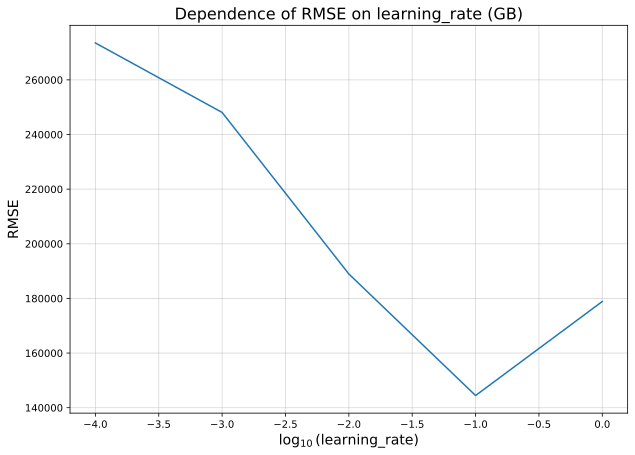

In [280]:
plt.figure(figsize=(10,7))
plt.title("Dependence of RMSE on learning_rate (GB)", fontsize=16)
plt.plot(np.log10(alpha), scores)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("$\log_{10}$(learning_rate)", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

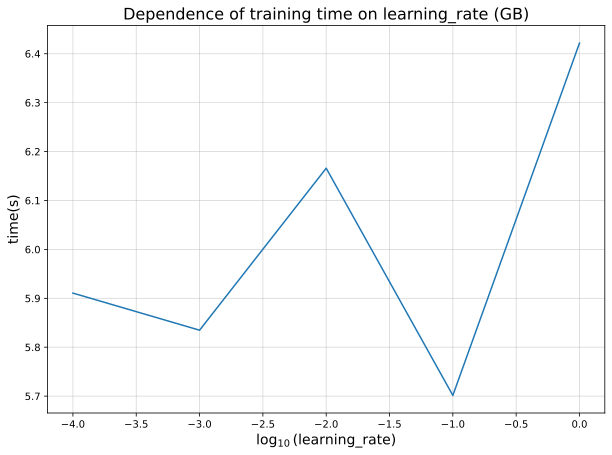

In [286]:
plt.figure(figsize=(10,7))
plt.title("Dependence of training time on learning_rate (GB)", fontsize=16)
plt.plot(np.log10(alpha), training_time)
plt.ylabel("time(s)", fontsize=14)
plt.xlabel("$\log_{10}$(learning_rate)", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

Теперь проверим около 0.1

In [283]:
alpha = np.linspace(0.01, 0.51, 10)

depth = 3
n_trees = 400
feature_size = 6
scores = []
training_time = []

for a in alpha:
    tmp = ens.GradientBoostingMSE(n_trees, max_depth=depth, 
            feature_subsample_size=feature_size, learning_rate=a)
    now_time = time()
    tmp.fit(X_train, y_train)
    training_time.append(time() - now_time)
    scores.append(np.sqrt(mean_squared_error(y_holdout, tmp.predict(X_holdout))))

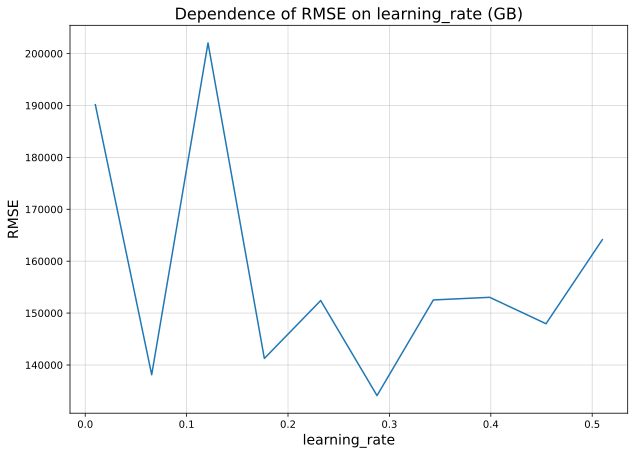

In [284]:
plt.figure(figsize=(10,7))
plt.title("Dependence of RMSE on learning_rate (GB)", fontsize=16)
plt.plot(alpha, scores)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("learning_rate", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

Оптимальный `learning_rate` == 0.3